Create a notebook or python script named advanced_dataframes to do your work in for this exercise.

For the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

In [1]:
from pydataset import data
import numpy as np
import pandas as pd

When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

In [2]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
mpg['average_mileage']= (mpg.hwy+mpg.cty)/2
mpg.groupby('manufacturer').average_mileage.max()
#Volkswagen has the best overall mpgtr

manufacturer
audi          25.5
chevrolet     26.0
dodge         21.0
ford          22.0
honda         30.5
hyundai       26.0
jeep          19.5
land rover    15.0
lincoln       15.0
mercury       16.0
nissan        27.5
pontiac       23.0
subaru        23.5
toyota        32.5
volkswagen    39.5
Name: average_mileage, dtype: float64

## Question #1: 

Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

On average, which manufacturer has the best miles per gallon?
How many different manufacturers are there?
How many different models are there?
Do automatic or manual cars have better miles per gallon?

In [4]:
mpg.groupby('manufacturer').average_mileage.mean()

manufacturer
audi          22.027778
chevrolet     18.447368
dodge         15.540541
ford          16.680000
honda         28.500000
hyundai       22.750000
jeep          15.562500
land rover    14.000000
lincoln       14.166667
mercury       15.625000
nissan        21.346154
pontiac       21.700000
subaru        22.428571
toyota        21.720588
volkswagen    25.074074
Name: average_mileage, dtype: float64

In [5]:
len(mpg.manufacturer.unique())

15

In [6]:
mpg.groupby('model').manufacturer.max().value_counts().sum()

38

In [7]:
mpg.grouby('trans').groupby('average_mileage')

AttributeError: 'DataFrame' object has no attribute 'grouby'

## Question # 2

In [ ]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them

In [ ]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

In [ ]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

In [ ]:
pd.merge(users, roles, how='outer')

## Question # 3

Getting data from SQL databases
<ul>
    
<li>Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like  in the examples in this lesson.

In [8]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [13]:
employees= pd.read_sql("""select * from employees""", get_db_url('employees'))

In [14]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [15]:
titles= pd.read_sql("""select * from titles""", get_db_url('employees'))

In [16]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [19]:
current_employees= titles[titles.to_date == titles.to_date.max()]

In [25]:
current_employees_with_titles=current_employees.groupby('title').emp_no.agg(['count'])
current_employees_with_titles

,count
title,
Assistant Engineer,3588
Engineer,30983
Manager,9
Senior Engineer,85939
Senior Staff,82024
Staff,25526
Technique Leader,12055


In [29]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

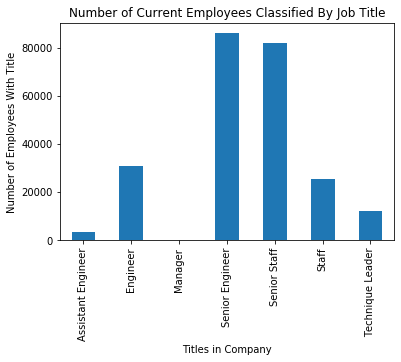

In [43]:
current_employees_with_titles.sum(axis=1).plot.bar()
plt.title  ("Number of Current Employees Classified By Job Title")
plt.xlabel ("Titles in Company")
plt.ylabel ("Number of Employees With Title")
plt.show

<li>Visualize the number of employees with each title.

<li>Use your function to obtain a connection to the employees database.
<li>Once you have successfully run a query:
<li>Intentionally make a typo in the database url. What kind of error message do you see?
<li>Intentionally make an error in your SQL query. What does the error message look like?
    <br>
<li>Read the employees and titles tables into two separate dataframes
    

<li>Join the employees and titles dataframes together.
    

In [52]:
employees_with_titles=pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='left')
employees_with_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


<li>Visualize how frequently employees change titles.

<li>For each title, find the hire date of the employee that was hired most recently with that title.

In [47]:
most_recent_hires = employees_with_titles.groupby('title').hire_date.agg(['max'])
most_recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


<li>Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [51]:
# Write SQL that pulls the current employee records
number_of_titles_by_departments = pd.read_sql("""select dept_name, title from departments
join dept_emp
using (dept_no)
join titles
using (emp_no)
where titles.to_date > curdate()
and dept_emp.to_date > curdate()""", get_db_url('employees'))

number_of_titles_by_departments

pd.crosstab(number_of_titles_by_departments.dept_name, number_of_titles_by_department.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

What is the total price for each order?

## Question # 4

Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [55]:
chipotle= pd.read_sql("""select * from orders""", get_db_url('chipotle'))
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


What is the total price for each order?

In [56]:
costs = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
total_price = costs.groupby('order_id').money_price.agg(['sum'])
total_price

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


What are the most popular 3 items?

In [57]:
item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
item_counts.nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


Which item has produced the most revenue?

In [58]:
item_revenue = costs.groupby('item_name').money_price.agg(['sum'])
item_revenue.nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73
